Malav Pandya

91044866

# Problem 1: Basics of Clustering

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from scipy import linalg

## (a)

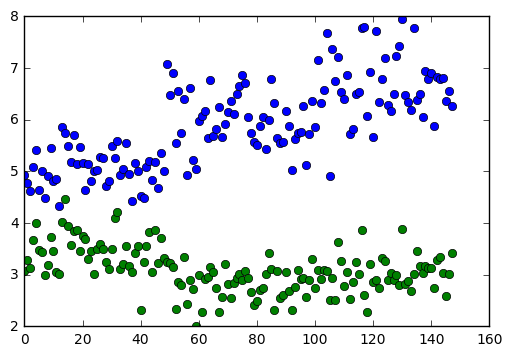

In [2]:
X = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
X = X[:,0:2];

plt.plot(X, 'o');
plt.show()

## (b)

C:\Users\Malav.MPandya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


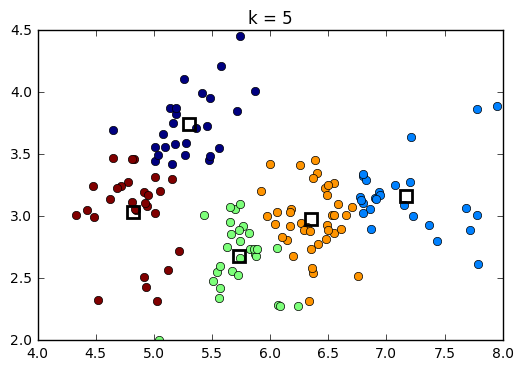

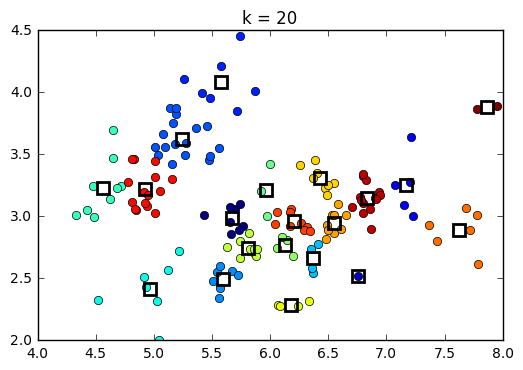

In [3]:
K = 5;
bestSum = np.inf;
for i in range(0,10):
    zz,cc,ssumd = ml.cluster.kmeans(X, K);
    if(ssumd < bestSum):
        z = zz;
        c = cc;
        sumd = ssumd;

ml.plotClassify2D(None,X,z);
plt.plot(c[:,0], c[:,1], 's', mfc='none', markeredgecolor='k', mew=2, ms=8);
plt.legend(loc="lower right");
plt.title("k = 5");
plt.show();

K = 20;
bestSum = np.inf;
for i in range(0,10):
    zz,cc,ssumd = ml.cluster.kmeans(X, K);
    if(ssumd < bestSum):
        z = zz;
        c = cc;
        sumd = ssumd;

plt.figure()
ml.plotClassify2D(None,X,z);
plt.plot(c[:,0], c[:,1], 's', mfc='none', markeredgecolor='k', mew=2, ms=8);
plt.legend(loc="lower right");
plt.title("k = 20");
plt.show();

## (c)

### Single Linkage

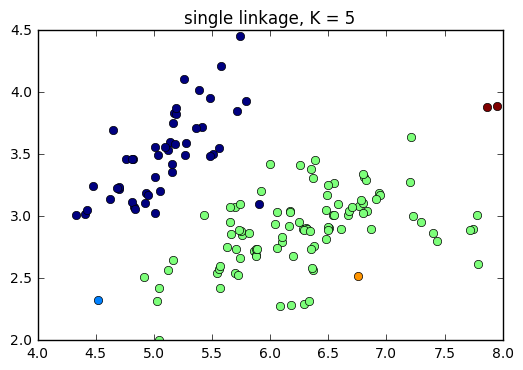

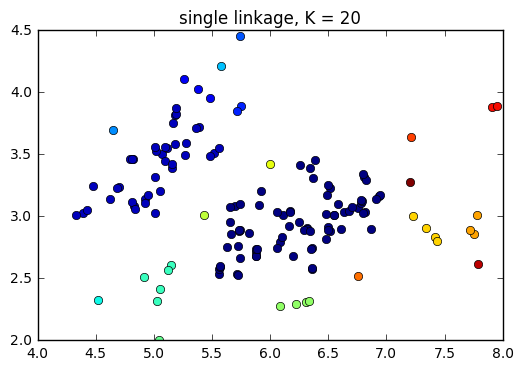

In [4]:
K = 5;
z,join = ml.cluster.agglomerative(X,K, method = 'min');
plt.figure();
ml.plotClassify2D(None,X,z);
plt.title("single linkage, K = 5")
plt.show()

K = 20;
z,join = ml.cluster.agglomerative(X,K, method = 'min');
plt.figure();
ml.plotClassify2D(None,X,z);
plt.title("single linkage, K = 20")
plt.show()

### Complete Linkage

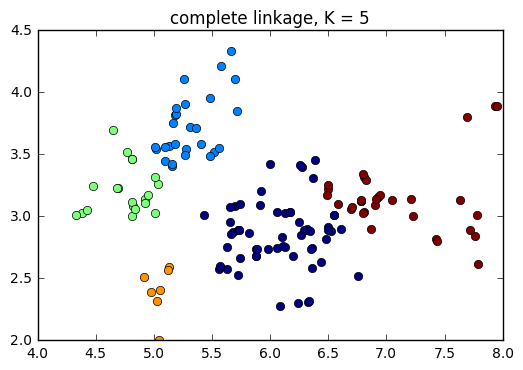

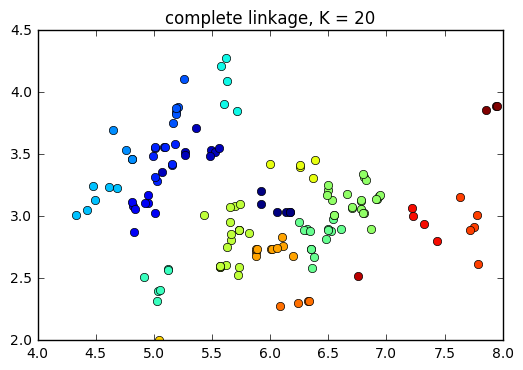

In [5]:
K = 5;
z,join = ml.cluster.agglomerative(X,K, method = 'max');
plt.figure();
ml.plotClassify2D(None,X,z);
plt.title("complete linkage, K = 5")
plt.show()

K = 20;
z,join = ml.cluster.agglomerative(X,K, method = 'max');
plt.figure();
ml.plotClassify2D(None,X,z);
plt.title("complete linkage, K = 20")
plt.show()

# Problem 2: EigenFaces

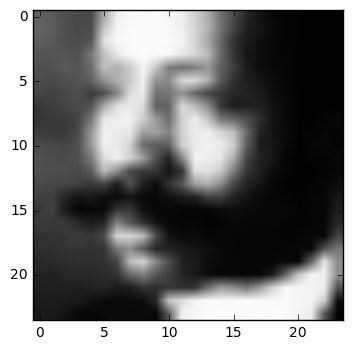

In [6]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[0,:],(24,24)) 
plt.imshow( img.T , cmap="gray") 
axis = plt.axis();
plt.show()

## (a)

In [7]:
mu = np.mean( X, axis=0, keepdims=True ) 
X0 = X - mu 
print(mu.shape[1])

576


## (b)

In [8]:
U,S,Vh = linalg.svd(X0,False); #X0 = U * diag(S) * Vh
W = U.dot(np.diag(S));

## (c)

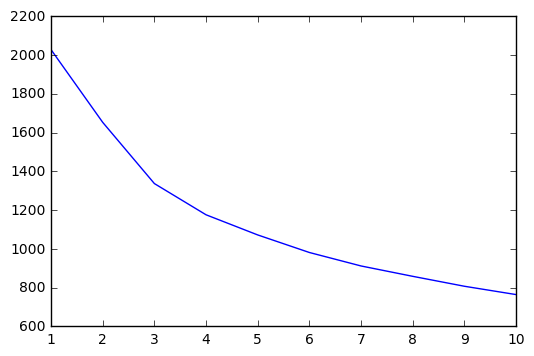

In [9]:
means = [None] * 10;
k_arr = np.arange(1,11);
for i,K in enumerate(k_arr):
    X_0 = W[:,:K].dot(Vh[:K,:]);
    means[i] = np.mean((X0 - X_0)**2);

plt.figure();
plt.plot(k_arr,means);
plt.show()

## (d)

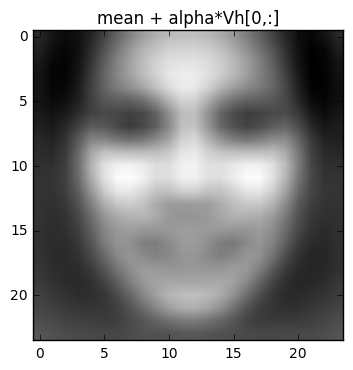

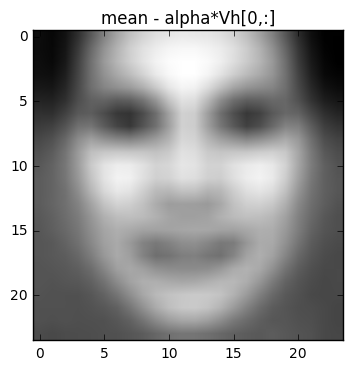

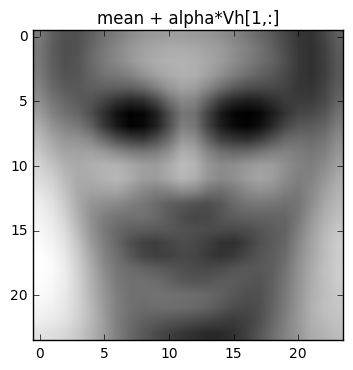

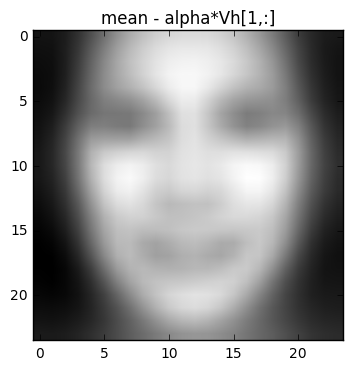

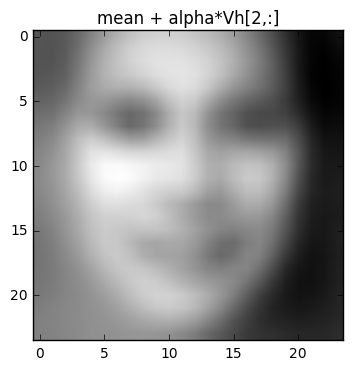

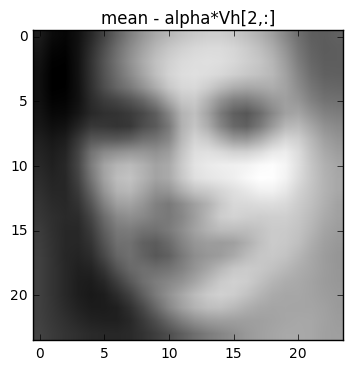

In [10]:
for i in range(3):
    alpha = 2*np.median(np.abs(W[:,i]));
    pDir = mu + alpha*(Vh[i,:]);
    pDir = np.reshape(pDir[0,:],(24,24));
    plt.figure();
    plt.imshow(pDir.T, cmap = "gray");
    plt.title("mean + alpha*Vh[" + str(i) + ",:]");
    plt.show()
          
    pDir = mu - alpha*(Vh[i,:]);
    pDir = np.reshape(pDir[0,:],(24,24));
    plt.figure();
    plt.imshow(pDir.T, cmap = "gray");
    plt.title("mean - alpha*Vh[" + str(i) + ",:]");
    plt.show()

## (e)

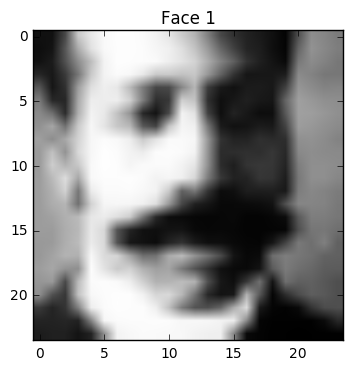

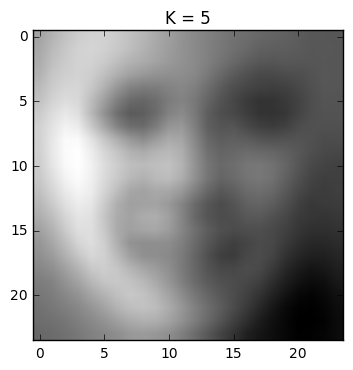

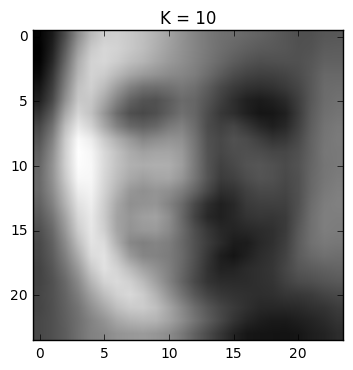

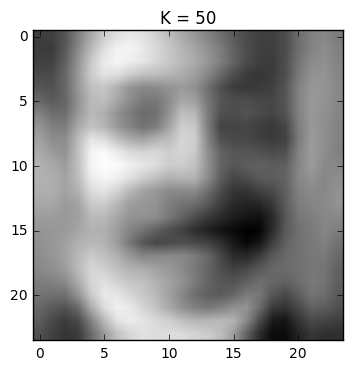

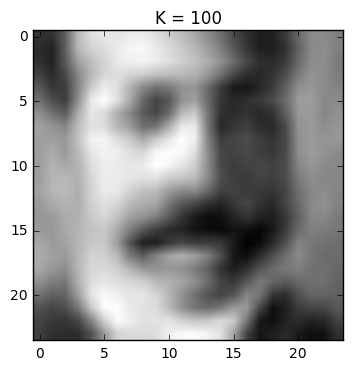

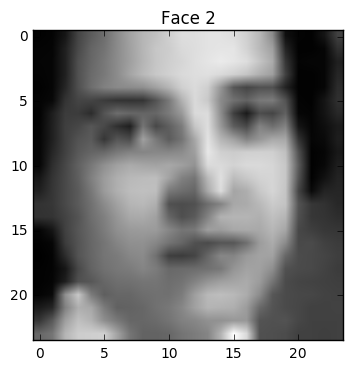

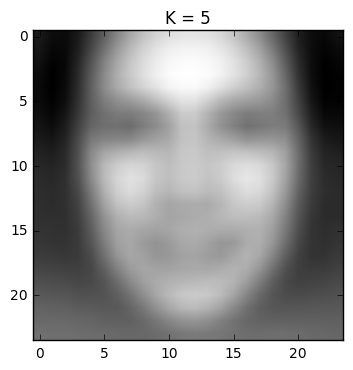

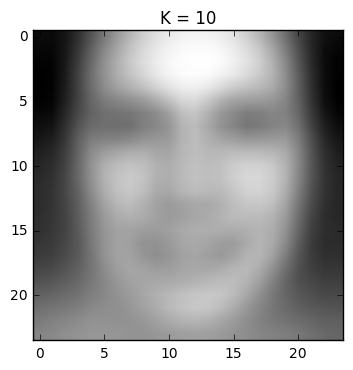

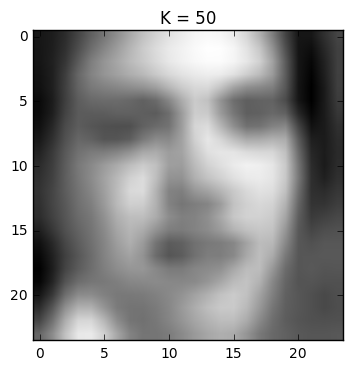

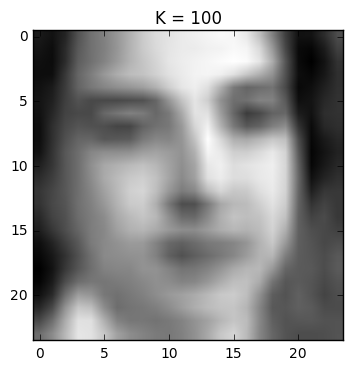

In [11]:
aimg = np.reshape(X[1,:],(24,24));
plt.figure();
plt.imshow(aimg.T, cmap = "gray");
plt.title("Face 1");
k = [5,10,50,100];
for i,K in enumerate(k):
    X_0 = mu + W[1,:K].dot(Vh[:K,:]); 
    img = np.reshape(X_0[:],(24,24));
    plt.figure();
    plt.imshow(img.T, cmap = "gray");
    plt.title("K = " + str(K));
    plt.show()

aimg = np.reshape(X[2,:],(24,24));
plt.figure();
plt.imshow(aimg.T, cmap = "gray");
plt.title("Face 2");
k = [5,10,50,100];
for i,K in enumerate(k):
    X_0 = mu + W[2,:K].dot(Vh[:K,:]); 
    img = np.reshape(X_0[:],(24,24));
    plt.figure();
    plt.imshow(img.T, cmap = "gray");
    plt.title("K = " + str(K));
    plt.show()

## (f)

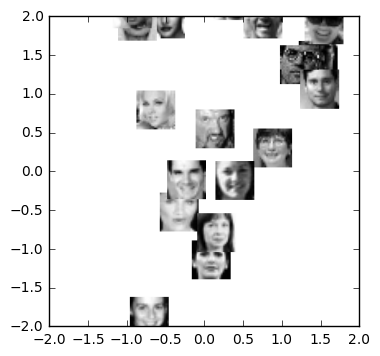

In [12]:
idx = np.random.randint(1, 4915, size = 20);

coord,params = ml.transforms.rescale( W[:,0:2] ) 
plt.figure(); plt.hold(True); # you may need this for pyplot
for i in idx:
# compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to reasonable visual scale

plt.show()